In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
df = pd.read_csv(r"C:\Users\Usuario\Downloads\LEGO_MULTIPLE_LINEAR_REGRESSION.csv")

In [5]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df.head()

,piezas,minifiguras,edad_recomendada,familia,precio
0,1226,1,10,City,110.733305
1,1559,6,14,Marvel,158.819469
2,960,1,8,Star Wars,93.443161
3,1394,2,6,Star Wars,143.542791
4,1230,1,16,Harry Potter,128.027522


In [7]:
df.familia.unique()#devuelve un array (una lista) con todos los valores únicos que se encuentran en la columna llamada "familia"

array(['City', 'Marvel', 'Star Wars', 'Harry Potter', 'Classic'],
      dtype=object)

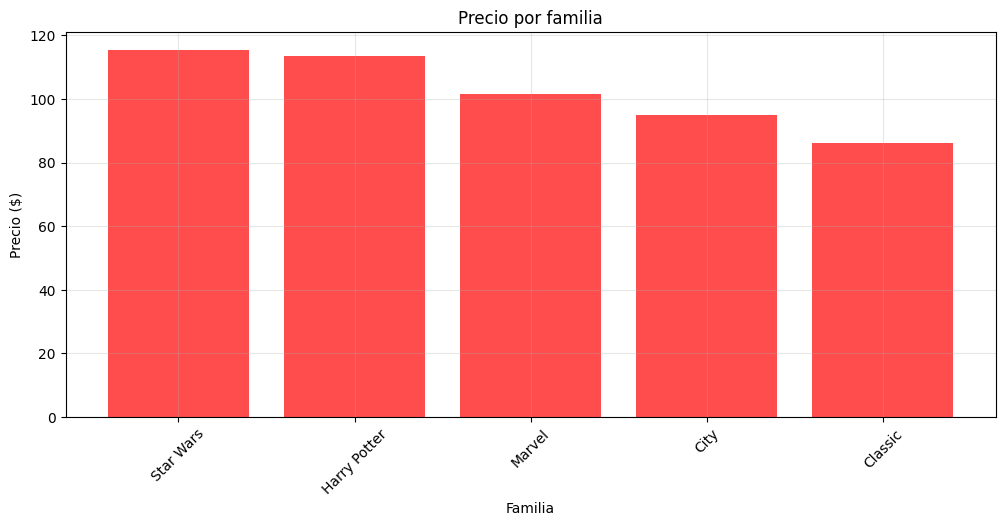

In [8]:
plt.figure(figsize = (12, 5))

familia_precio = df.groupby('familia')['precio'].mean().sort_values(ascending = False)
plt.bar(familia_precio.index, familia_precio.values, color = 'red', alpha = 0.7)
plt.xlabel('Familia')
plt.ylabel('Precio ($)')
plt.title('Precio por familia')
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)

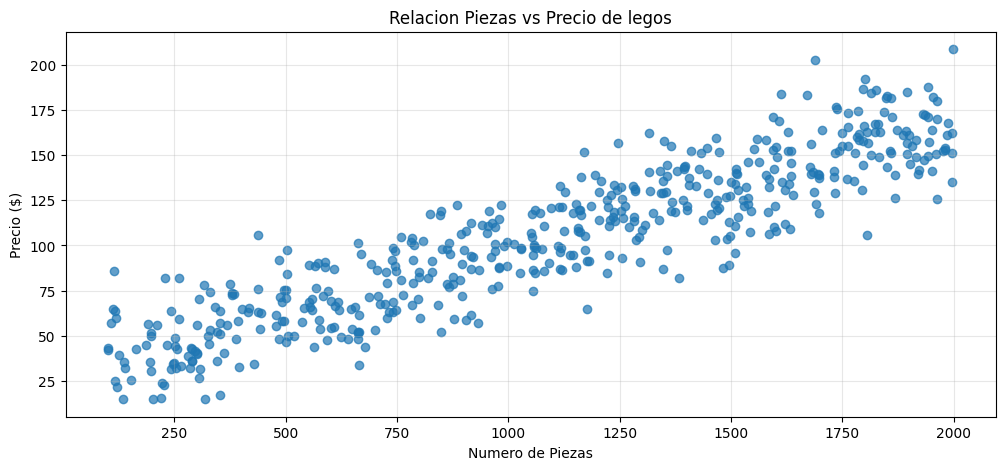

In [9]:
plt.figure(figsize = (12, 5))

plt.scatter(df['piezas'], df['precio'], alpha = 0.7)
plt.xlabel('Numero de Piezas')
plt.ylabel('Precio ($)')
plt.title('Relacion Piezas vs Precio de legos')
plt.grid(True, alpha = 0.3)

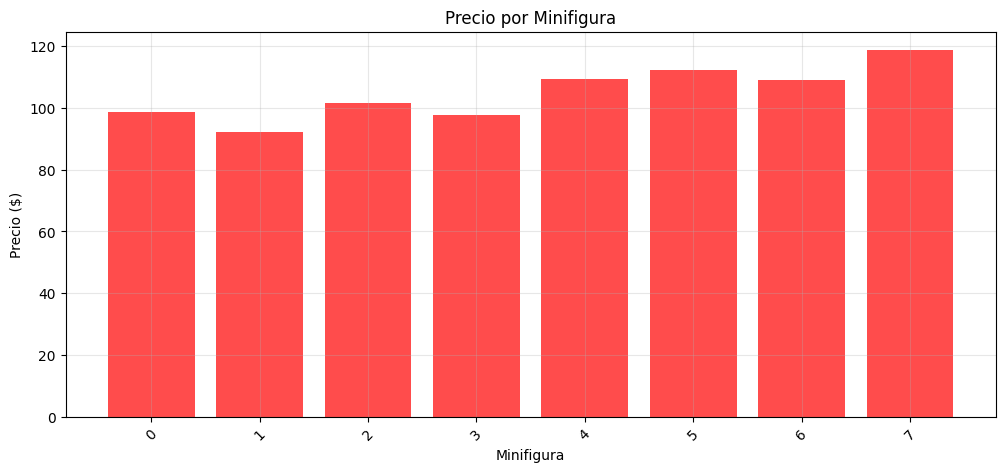

In [10]:
plt.figure(figsize = (12, 5))

minifigura_precio = df.groupby('minifiguras')['precio'].mean().sort_values(ascending = False)
plt.bar(minifigura_precio.index, minifigura_precio.values, color = 'red', alpha = 0.7)
plt.xlabel('Minifigura')
plt.ylabel('Precio ($)')
plt.title('Precio por Minifigura')
plt.xticks(rotation = 45)
plt.grid(True, alpha = 0.3)

### Modelo 

In [11]:
X = df.drop('precio', axis = 1)
y = df['precio']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train.shape[0] / X.shape[0]

0.7

In [14]:
numeric_cols = ['piezas', 'minifiguras', 'edad_recomendada']
categorical_cols = ['familia']

In [23]:
X_train_num = X_train[numeric_cols]
X_train_cat = X_train[categorical_cols]
# separa las columnas de un conjunto de datos en dos grupos: numéricas y categóricas.
X_test_num = X_test[numeric_cols]
X_test_cat = X_test[categorical_cols]

In [16]:
scaler = StandardScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)

X_test_num_scaled = scaler.transform(X_test_num)

In [17]:
X_train_num_scaled_df = pd.DataFrame(X_train_num_scaled, columns = numeric_cols, index = X_train_num.index)
X_test_num_scaled_df = pd.DataFrame(X_test_num_scaled, columns = numeric_cols, index = X_test_num.index)

In [18]:
X_train_num_scaled_df.describe()

,piezas,minifiguras,edad_recomendada
count,3.500000e+02,3.500000e+02,3.500000e+02
mean,-1.624098e-16,-1.015061e-16,-1.827110e-16
std,1.001432e+00,1.001432e+00,1.001432e+00
min,-1.882875e+00,-1.603732e+00,-1.404486e+00
25%,-8.348072e-01,-6.812895e-01,-8.322272e-01
50%,7.227297e-02,2.411528e-01,-2.599688e-01
75%,8.855173e-01,7.023739e-01,8.845480e-01
max,1.661414e+00,1.624816e+00,1.456806e+00


# Variables CAtegoricas


In [19]:
onehot = OneHotEncoder(drop = 'first')

In [20]:
X_train_cat_encoded = onehot.fit_transform(X_train_cat)

In [21]:
X_test_cat_encoded = onehot.transform(X_test_cat)

In [22]:
cat_features_names = onehot.get_feature_names_out(categorical_cols)